## <div align="center"> TUGAS LAB IF540 MACHINE LEARNING </div>
### <div align="center"> WEEK [07] : [Klasifikasi Bayes dan Support Vector] </div>

#### <div align="center"> Semester Ganjil 2023/2024 </div>

In [1]:
import datetime
import uuid    

# Fill in your name and NIM
myName = "Steven Indriano"
myNIM = "57217"

myDate = datetime.datetime.now()
myDevice = str(uuid.uuid1())

# Header
print("Name: \t\t{}".format(myName))
print("NIM: \t\t{}".format(myNIM))
print("Start: \t\t{}".format(myDate))
print("Device ID: \t{}".format(myDevice))

Name: 		Steven Indriano
NIM: 		57217
Start: 		2023-10-15 20:05:30.782361
Device ID: 	84b6a9ff-6b5b-11ee-92f0-f057a69a9c86



---

### Dataset yang dipakai:

1. [Breast Cancer Wisconsin Diagnostic Dataset] – sumber : [https://www.kaggle.com/datasets/utkarshx27/breast-cancer-wisconsin-diagnostic-dataset]
2. [Diamond Price] – sumber : [https://www.kaggle.com/datasets/joebeachcapital/diamonds]

### Hasil kerja

In [2]:
https://www.kaggle.com/datasets/joebeachcapital/diamonds# Your codes are here (replace the following codes)
import time
time.sleep(10)

In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

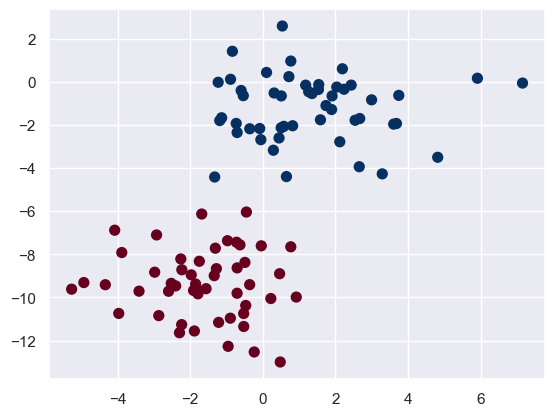

In [4]:
from sklearn.datasets import make_blobs
X,y = make_blobs(100,2,centers=2, random_state=2,cluster_std=1.5)
plt.scatter(X[:,0],X[:,1], c=y, s=50, cmap='RdBu')

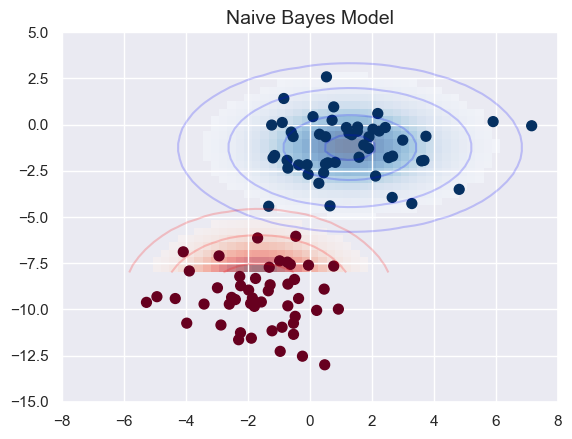

In [5]:
from sklearn.datasets import make_blobs
X, y = make_blobs(100, 2, centers=2, random_state=2, cluster_std=1.5)

fig, ax = plt.subplots()

ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu')
ax.set_title('Naive Bayes Model', size=14)

xlim = (-8,8)
ylim = (-15, 5)

xg = np.linspace(xlim[0],xlim[1], 60)
yg = np.linspace(xlim[0],xlim[1], 40)
xx, yy = np.meshgrid(xg, yg)
Xgrid = np.vstack([xx.ravel(), yy.ravel()]).T

for label, color in enumerate(['red', 'blue']):
    mask = (y == label)
    mu, std = X[mask].mean(0), X[mask].std(0)
    P = np.exp(-0.5 * (Xgrid - mu) ** 2 / std ** 2).prod(1)
    Pm = np.ma.masked_array(P, P < 0.03)
    ax.pcolorfast(xg, yg, Pm.reshape(xx.shape), alpha =0.5,
                cmap=color.title() + 's')
    ax.contour(xx, yy, P.reshape(xx.shape),
              levels=[0.01, 0.1, 0.5, 0.9],
              colors=color, alpha=0.2)
    
    ax.set(xlim=xlim, ylim=ylim)

In [6]:
from sklearn.naive_bayes import GaussianNB
model=GaussianNB()
model.fit(X,y)

GaussianNB()

In [7]:
rng=np.random.RandomState(0)
Xnew=[-6, -14]+[14,18]*rng.rand(2000,2)
ynew = model.predict(Xnew)

(-5.890554373486014,
 7.777566725032841,
 -13.775943665162341,
 3.3634536696825847)

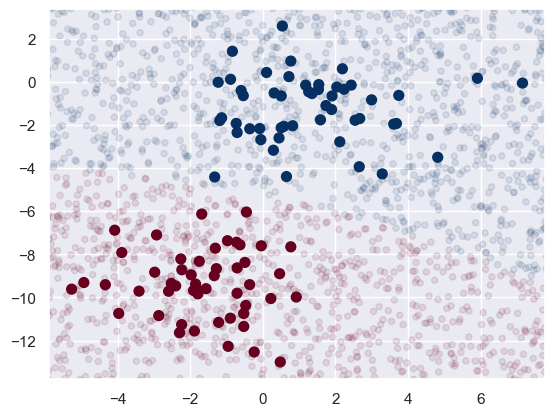

In [8]:
plt.scatter(X[:,0], X[:,1], c=y, s=50, cmap='RdBu')
lim=plt.axis()
plt.scatter(Xnew[:, 0], Xnew[:, 1], c=ynew, s=20, cmap='RdBu', alpha=0.1)
plt.axis(lim)

In [9]:
yprob= model.predict_proba(Xnew)
yprob[-8:].round(2)

array([[0.89, 0.11],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [0.  , 1.  ],
       [0.15, 0.85]])

In [10]:
from sklearn.datasets import fetch_20newsgroups
data=fetch_20newsgroups()
data.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [11]:
categories = ['talk.religion.misc', 'soc.religion.christian',
             'sci.space','comp.graphics']
train= fetch_20newsgroups(subset='train',categories=categories)
test= fetch_20newsgroups(subset='test',categories=categories)
print(train.data[5])

From: dmcgee@uluhe.soest.hawaii.edu (Don McGee)
Subject: Federal Hearing
Originator: dmcgee@uluhe
Organization: School of Ocean and Earth Science and Technology
Distribution: usa
Lines: 10


Fact or rumor....?  Madalyn Murray O'Hare an atheist who eliminated the
use of the bible reading and prayer in public schools 15 years ago is now
going to appear before the FCC with a petition to stop the reading of the
Gospel on the airways of America.  And she is also campaigning to remove
Christmas programs, songs, etc from the public schools.  If it is true
then mail to Federal Communications Commission 1919 H Street Washington DC
20054 expressing your opposition to her request.  Reference Petition number

2493.



In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

model = make_pipeline(TfidfVectorizer(), MultinomialNB())

In [13]:
model.fit(train.data, train.target)
labels = model.predict(test.data)

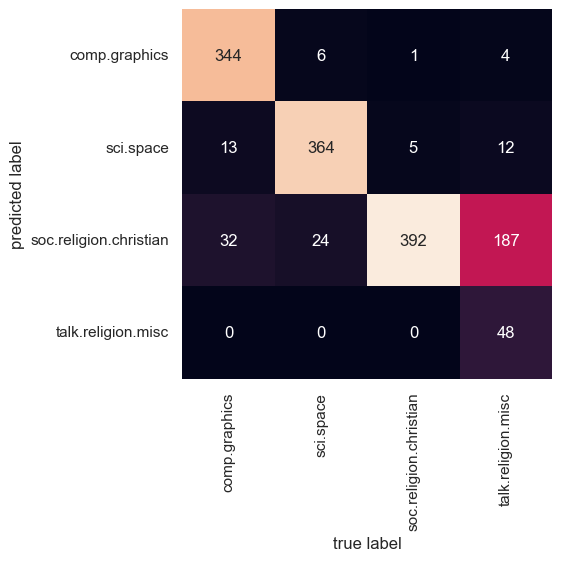

In [14]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(test.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
           xticklabels=train.target_names, yticklabels=train.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [15]:
def predict_category(text):
    predicted_category = model.predict(text)
    return predicted_category

predict_category('sending a payload to the ISS')
print(predicted)

ValueError: Iterable over raw text documents expected, string object received.

In [16]:
predict_category('discussing islam vs atheism')

ValueError: Iterable over raw text documents expected, string object received.

In [ ]:
predict_category('determining the screen resolution')

In [17]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# use seaborn plotting defaults
import seaborn as sns; sns.set()

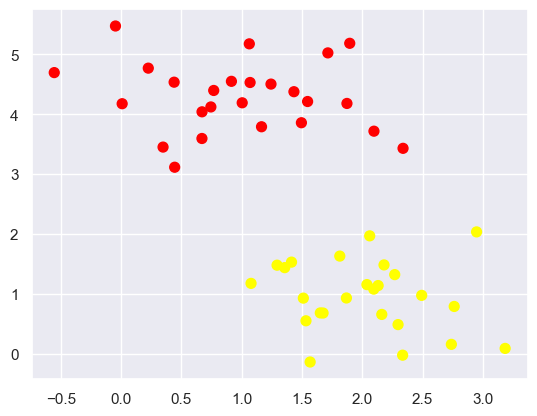

In [18]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

X, y = make_blobs(n_samples=50, centers=2, random_state=0, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plt.show()

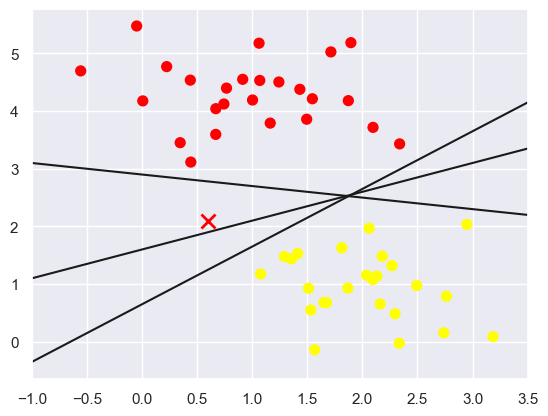

In [19]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plt.plot([0.6], [2.1], 'x', color='red', markeredgewidth=2, markersize=10)

for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
    plt.plot(xfit, m * xfit + b, '-k')
    
plt.xlim(-1, 3.5);

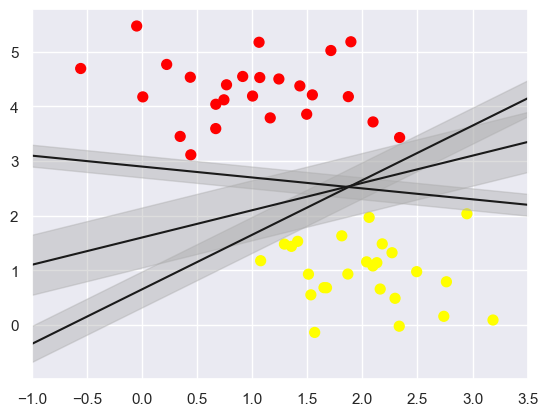

In [20]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit -d, yfit + d, edgecolor='none',
                    color='#AAAAAA', alpha=0.4)
    plt.xlim(-1, 3.5);

In [58]:
from sklearn.svm import SVC # "Support vector Classifier"
model = SVC(kernel='linear', C=1E10)
model.fit(X, y)

SVC(C=10000000000.0, kernel='linear')

In [61]:
def plot_svc_decision_function (model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    p = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, p, colors='k',
              levels=[-1, 0, 1], alpha=0.5,
              linestyles=['--', '-', '--'])
    
    #plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                  model.support_vectors_[:, 1],
                  s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

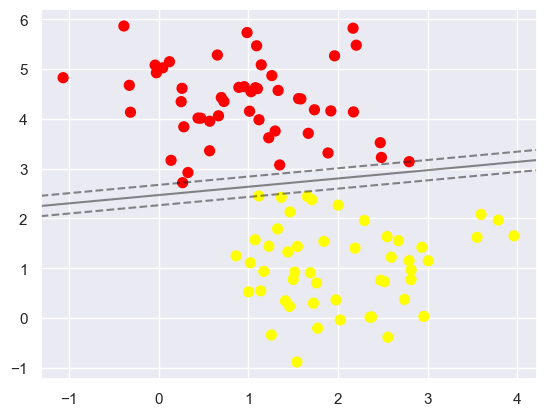

In [62]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model)

In [26]:
model.support_vectors_

array([[0.44359863, 3.11530945],
       [2.33812285, 3.43116792],
       [2.06156753, 1.96918596]])

In [65]:
def plot_svm(N=10, ax=None):
    X, y = make_blobs(n_samples=200, centers=2,
                     random_state=0, cluster_std=0.60)
    X = X[:N]
    y = y[:N]
    model = SVC(kernel='linear', C=1E10)
    model.fit(X, y)
    
    ax = ax or plt.gca()
    ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    ax.set_xlim(-1, 4)
    ax.set_ylim(-1, 6)
    plot_svc_decision_function(model, ax)
    
    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
    for axi, N in zip(ax, [60, 120]):
        plot_svm(N, axi)
        axi.set_title('N = {0}'.format(N))

In [66]:
from ipywidgets import interact, fixed
interact(plot_svm, N[10, 200], ax=fixed(None));

IndentationError: expected an indented block (4261674432.py, line 3)

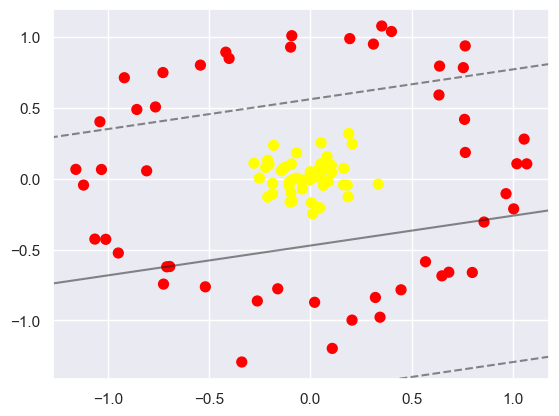

In [67]:
from sklearn.datasets import make_circles
from sklearn.svm import SVC
import matplotlib.pyplot as plt

X, y = make_circles(n_samples=100, factor=0.1, noise=0.1)


clf = SVC(kernel='linear').fit(X, y)


plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf, plot_support=False)


plt.show()


In [31]:
r = np.exp(-(X ** 2).sum(1))

In [33]:
from mpl_toolkits import mplot3d

def plot_3D(elev=30, azim=30, X=X, y=y):
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=50, cmap='autumn')
    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    
interact(plot_3D, elev=[-90, 90], azip=(-180, 180),
        X=fixed(X), y=fixed(y));

interactive(children=(Dropdown(description='elev', options=(-90, 90), value=-90), IntSlider(value=30, descript…

In [34]:
clf = SVC(kernel='rbf', C=1E6)
clf.fit(X, y)

SVC(C=1000000.0)

TypeError: plot_svc_decision_function() missing 1 required positional argument: 'ax'

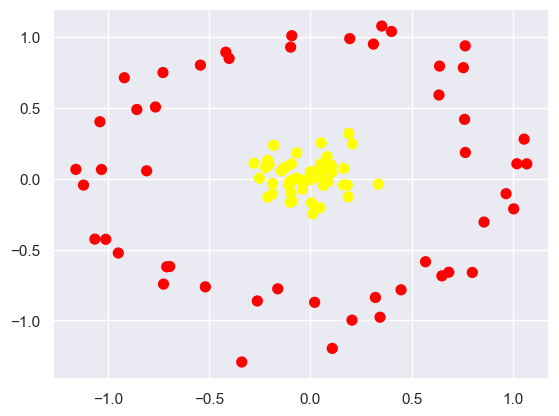

In [69]:
def plot_svc_decision_function(model, ax, plot_support=True):
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # Create a grid of points
    xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50),
                         np.linspace(ylim[0], ylim[1], 50))
    
    # Evaluate the decision function on this grid
    Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Plot decision boundary and margins
    ax.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
    
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=300, lw=1, facecolors='none')

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
           s=300, linewidth=1, facecolors='none')

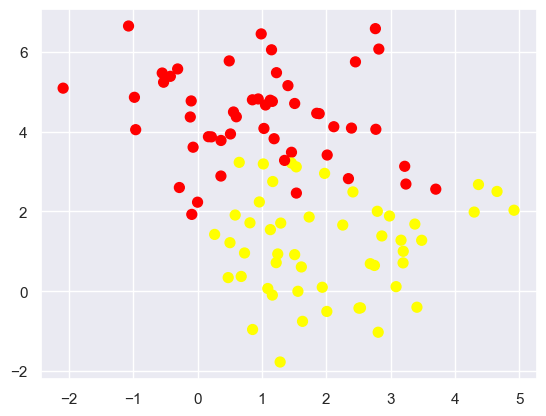

In [39]:
X, y = make_blobs(n_samples=100, centers=2,
                 random_state=0, cluster_std=1.2)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn');

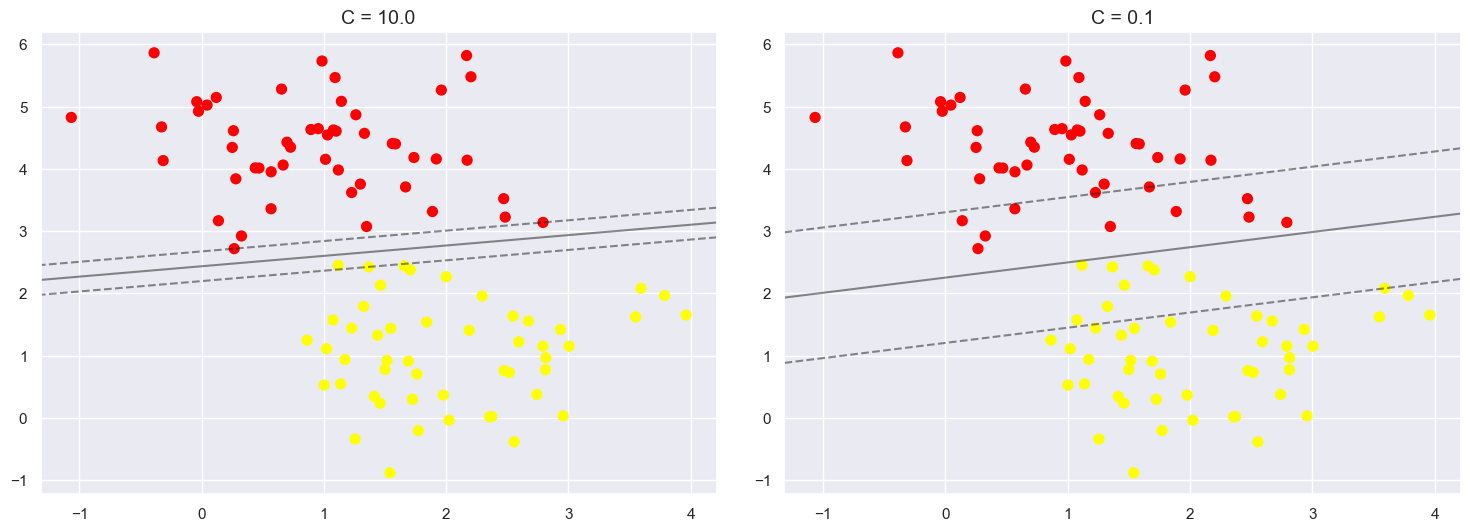

In [42]:
def plot_svc_decision_function(model, ax, plot_support=True):
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # Create a grid of points
    xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50),
                         np.linspace(ylim[0], ylim[1], 50))
    
    # Evaluate the decision function on this grid
    Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Plot decision boundary and margins
    ax.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
    
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=300, lw=1, facecolors='none')


X, y = make_blobs(n_samples=100, centers=2,
                 random_state=0, cluster_std=0.8)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

for axi, C in zip(ax, [10.0, 0.1]):
    model = SVC(kernel='linear', C=C).fit(X, y)
    axi.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    plot_svc_decision_function(model, axi)
    axi.scatter(model.support_vectors_[:, 0],
               model.support_vectors_[:, 1],
               s=300, lw=1, facecolors='none');
    axi.set_title('C = {0:.1f}'.format(C), size=14)

In [48]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


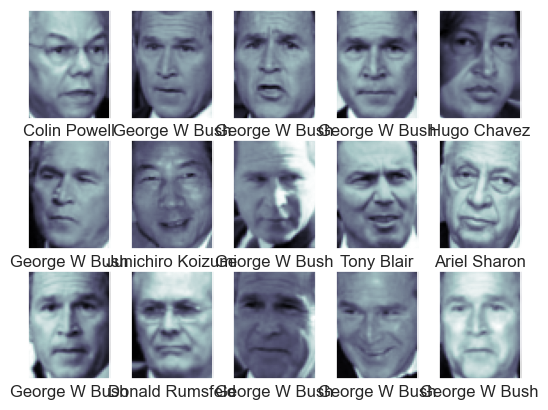

In [49]:
fig, ax = plt.subplots(3, 5)
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='bone')
    axi.set(xticks=[], yticks=[],
           xlabel=faces.target_names[faces.target[i]])

In [50]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA as RandomizedPCA
from sklearn.pipeline import make_pipeline

pca = RandomizedPCA(n_components=150, whiten=True, random_state=42)
svc = SVC(kernel='rbf', class_weight='balanced')
model = make_pipeline(pca, svc) 

In [51]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(faces.data, faces.target,
                                               random_state=42)

In [52]:
from sklearn.model_selection import GridSearchCV
param_grid = {'svc__C': [1, 5, 10, 50],
             'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]}
grid = GridSearchCV(model, param_grid)

%time grid.fit(Xtrain, ytrain)
print(grid.best_params_)

Wall time: 13.2 s
{'svc__C': 10, 'svc__gamma': 0.001}


In [53]:
model = grid.best_estimator_
yfit = model.predict(Xtest)

Text(0.5, 0.98, 'Predicted Names; Incorrect Labels in Red')

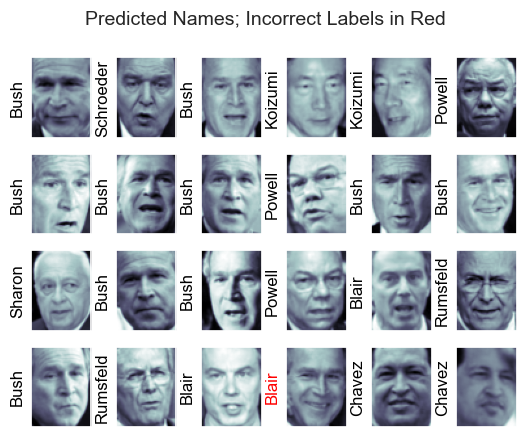

In [54]:
fig, ax = plt.subplots(4, 6)
for i, axi in enumerate(ax.flat):
    axi.imshow(Xtest[i].reshape(62, 47), cmap='bone')
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(faces.target_names[yfit[i]].split() [-1],
                  color='black' if yfit[i] == ytest[i] else 'red')
fig.suptitle('Predicted Names; Incorrect Labels in Red', size=14)

In [55]:
from sklearn.metrics import classification_report
print(classification_report(ytest, yfit,
                           target_names=faces.target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.65      0.73      0.69        15
     Colin Powell       0.80      0.87      0.83        68
  Donald Rumsfeld       0.74      0.84      0.79        31
    George W Bush       0.92      0.83      0.88       126
Gerhard Schroeder       0.86      0.83      0.84        23
      Hugo Chavez       0.93      0.70      0.80        20
Junichiro Koizumi       0.92      1.00      0.96        12
       Tony Blair       0.85      0.95      0.90        42

         accuracy                           0.85       337
        macro avg       0.83      0.84      0.84       337
     weighted avg       0.86      0.85      0.85       337



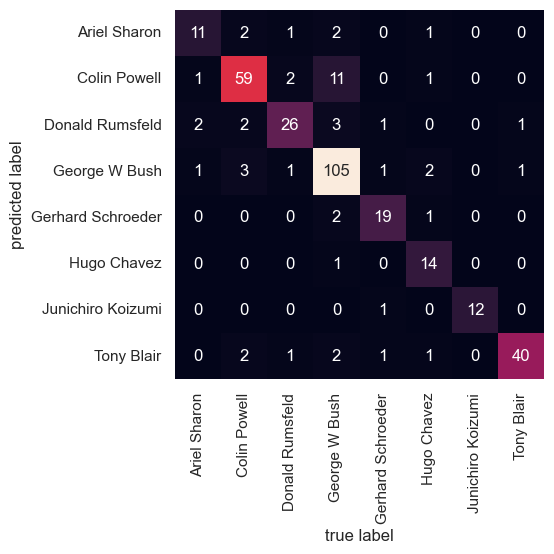

In [56]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(ytest, yfit)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
           xticklabels=faces.target_names,
           yticklabels=faces.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

### Kesimpulan



Berikan simpulan yang dilakukan dari hasil kerja menggunakan algoritma dan 2 dataset yang
dipilih. Simpulan bisa berkisar antara (bisa di modifikasi):

- Pemisahan dengan Margin Maksimum: SVM berusaha mencari hiperplane pemisah yang memiliki margin maksimum antara kelas yang berbeda.
- Penanganan Outlier: SVM efektif dalam menangani outlier dan dapat menghindari overfitting dengan baik.
- Transformasi Kernel: SVM dapat memanfaatkan kernel untuk menangani data yang tidak linier dengan mentransformasikan data ke ruang fitur yang lebih tinggi.

In [70]:
# Footer
myDate = datetime.datetime.now()
print("I certify that this is my own work.")
print("Signed by:")
print("Name: \t{}".format(myName))
print("NIM: \t{}".format(myNIM))
print("Time-stamp:\t{}".format(myDate))

I certify that this is my own work.
Signed by:
Name: 	Steven Indriano
NIM: 	57217
Time-stamp:	2023-10-15 21:18:17.960504


***

### Save the notebook, then convert the notebook to html (by running the next code).

In [ ]:
!jupyter nbconvert --to html "./IF540L_CL_laporan_M7_57217_Steven Indriano" --output-dir="./"

### Next step:
* convert the generated html file to PDF using the online tool: https://www.sejda.com/html-to-pdf
* choose the following settings:
    * Page size: One long page
    * Page Orientation: auto
    * Use print stylesheet
* Submit your ipython notebook and PDF files

Markdown basics https://markdown-guide.readthedocs.io/en/latest/basics.html#